# Pymaceuticals Inc.
---

### Analysis

- Observation 1: Capomulin and Ramicane are the most successful drugs in this trial.

- Observation 2: Mouse weight and average tumor volume have a large correlation.

- Observation 3: Near equal amounts of gender leaves little chance of bias for that attribute.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_frame = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
merged_frame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(len(merged_frame["Mouse ID"].unique()))

#merged_frame

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#clean_df = pd.DataFrame(merged_frame.duplicated(subset = ["Mouse ID", "Timepoint"]))
clean_df = pd.DataFrame(merged_frame.duplicated())

dupe_index = clean_df[clean_df[0] == True]

dupe_index

,0
137,True


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_df = pd.DataFrame(merged_frame.drop(merged_frame[merged_frame["Mouse ID"] == "g989"].index))
#merged_frame
#merged_frame.loc[137]

final_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(final_df["Mouse ID"].unique()))


248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_mean = final_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_median = final_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_var = final_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_std = final_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_err = final_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

summary = pd.DataFrame({"Mean Tumor Volume" : drug_mean, "Median Tumor Volume" : drug_median, "Tumor Volume Variance" : drug_var, "Tumor Volume Std. Dev." : drug_std, "Tumor Volume Std. Err." : drug_err})

summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

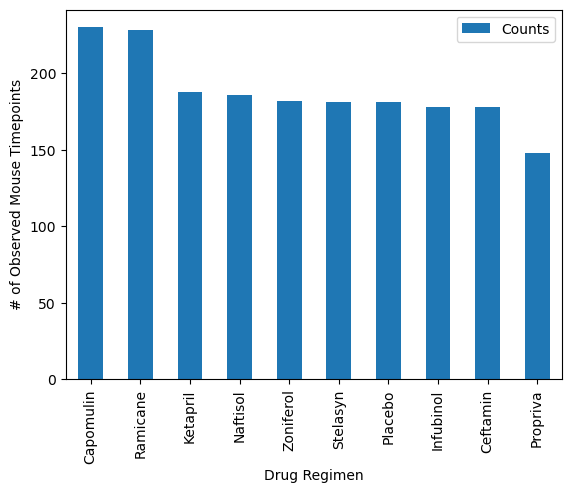

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#final_df.plot(kind = "bar", layout = (final_df["Drug Regimen"], final_df["Timepoint"].count))

pplot1 = pd.DataFrame({"Counts" : final_df["Drug Regimen"].value_counts()})
pplot1.plot(kind = "bar", ylabel= "# of Observed Mouse Timepoints")



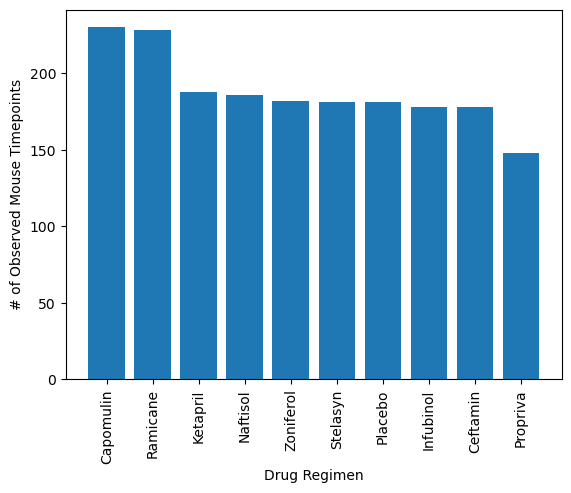

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.bar(x_axis, final_df["Drug Regimen"].value_counts())

ticks = [value for value in x_axis]
plt.xticks(ticks, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"], rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

Sex
Male      125
Female    123
Name: count, dtype: int64


<Axes: ylabel='count'>

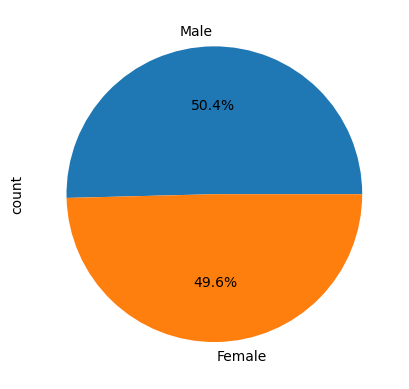

In [10]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = final_df.groupby(["Mouse ID"]).max()
g = gender["Sex"].value_counts()

print(g)

# Make the pie chart
g.plot(kind = "pie", autopct="%1.1f%%")

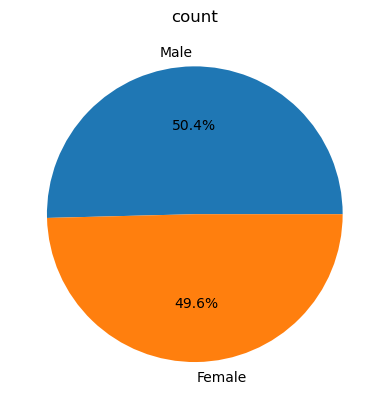

In [11]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = final_df.groupby(["Mouse ID"]).max()
g = gender["Sex"].value_counts()

# Make the pie chart
l = ["Male", "Female"]

plt.pie(g, labels = l, autopct="%1.1f%%")
plt.title("count")

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
largestVolume = final_df.groupby(["Mouse ID"]).max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
lV_df = pd.merge(final_df, largestVolume["Timepoint"], on = "Mouse ID")
lV_df = lV_df.rename(columns = {"Timepoint_x" : "Timepoint", "Timepoint_y" : "Final Timepoint"})

lV_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint
0,b128,0,45.0,0,Capomulin,Female,9,22,45
1,f932,0,45.0,0,Ketapril,Male,15,29,0
2,g107,0,45.0,0,Ketapril,Female,2,29,35
3,a457,0,45.0,0,Ketapril,Female,11,30,10
4,c819,0,45.0,0,Ketapril,Male,21,25,40


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    test = lV_df.loc[(lV_df["Drug Regimen"] == drug) & (lV_df["Timepoint"] == lV_df["Final Timepoint"])]

    temp = test["Tumor Volume (mm3)"]
    volume.append(temp)

    # Determine outliers using upper and lower bounds
    quartiles = test["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = [i for i in temp if (i > upper_bound) | (i < lower_bound)]

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


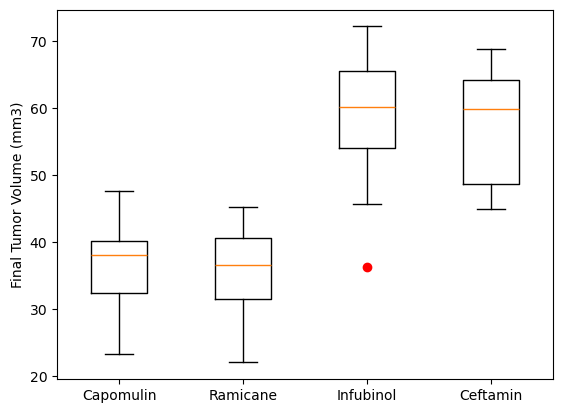

In [14]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
#ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(volume, tick_labels = drugs, sym = "red")

plt.show()

## Line and Scatter Plots

<Axes: xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

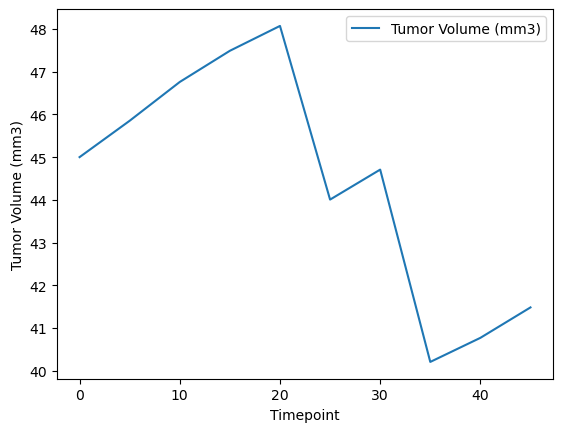

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouseL = lV_df.loc[(lV_df["Drug Regimen"] == "Capomulin") & (lV_df["Mouse ID"] == "l509") ]

mouseL.plot(x = "Timepoint", y = "Tumor Volume (mm3)", kind = "line", ylabel = "Tumor Volume (mm3)")

<Axes: xlabel='Average Weight', ylabel='Average Tumor Volume (mm3)'>

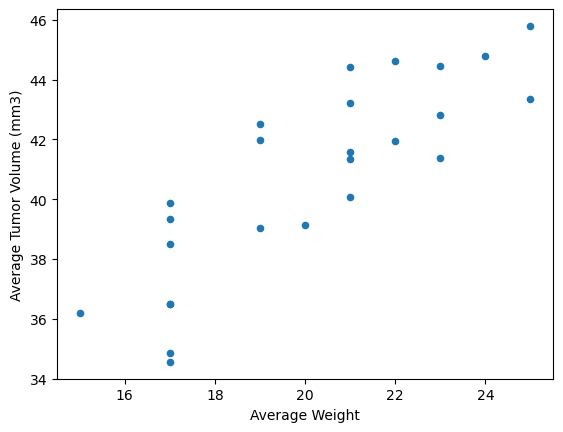

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap = lV_df.loc[lV_df["Drug Regimen"] == "Capomulin"]

vol = cap.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
w = cap.groupby(["Mouse ID"])["Weight (g)"].mean()

cap.head()

f = pd.DataFrame({"Average Tumor Volume (mm3)" : vol, "Average Weight" : w})


f.plot(x = "Average Weight", y = "Average Tumor Volume (mm3)", kind = "scatter")

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


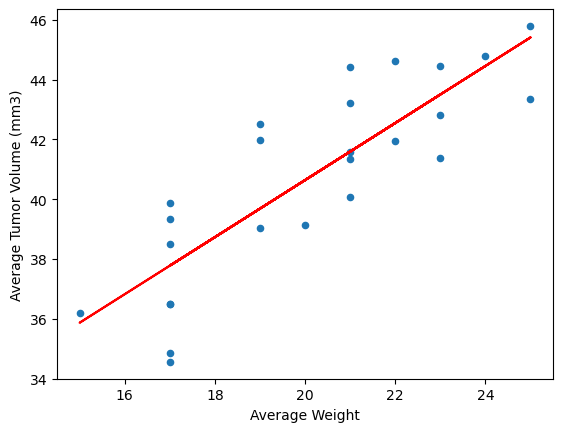

In [17]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, int, r, p, std_err = st.linregress(f["Average Weight"], f["Average Tumor Volume (mm3)"])

line = slope * f["Average Weight"] + int

print(f"The correlation between mouse weight and average tumor volume is {r:.02f}")
f.plot(x = "Average Weight", y = "Average Tumor Volume (mm3)", kind = "scatter")
plt.plot(f["Average Weight"], line, color = "red")